In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
pip install pathlib2

In [ ]:
pip install imbalanced-learn

In [ ]:
import pickle as pk
import pandas as pd
from pathlib2 import Path
import numpy as np
import os

def pk_read(path):
    with open(path, 'rb') as f:
        D = pk.load(f,encoding='utf8')
    return D

train=pk_read("/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_loan_processed_binary.pk")
test=pk_read("/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_2016_2017_processed_binary.pk")

In [ ]:
print("Train/Test data size: {}, {}"\
      .format(train.shape[0], test.shape[0]))

Train/Test data size: 791024, 758834


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
train, validation=train_test_split(train,train_size=0.9,stratify=train["loan_status"])

print(train.shape,validation.shape,test.shape)

(711921, 42) (79103, 42) (758834, 42)


In [ ]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received,loan_status
855339,12000.0,12000.0,12000.0,14.31,281.16,2,13,11.0,50000.0,25.37,0.0,1999,0.0,10.0,0.0,10308.0,42.6,24.0,0,10387.47,10387.47,3083.22,3083.22,1612.53,1470.69,0.0,281.16,0.0,0,0.0,0.0,44882.0,24200.0,1.0,0.0,2,60,0,1,0,1.0,0
324150,16000.0,16000.0,16000.0,11.67,528.92,1,8,11.0,99720.0,12.28,1.0,1995,0.0,16.0,0.0,42730.0,45.7,23.0,1,9134.96,9134.96,8991.64,8991.64,6865.04,2126.60,0.0,528.92,0.0,0,0.0,0.0,42730.0,93400.0,1.0,0.0,2,36,4,0,0,1.0,0
256369,33000.0,33000.0,33000.0,17.86,1190.72,3,19,11.0,136000.0,12.81,1.0,1993,1.0,13.0,0.0,26822.0,55.3,23.0,1,23047.45,23047.45,15430.24,15430.24,9952.55,5477.69,0.0,1305.06,0.0,0,0.0,91.0,80221.0,48500.0,1.0,1.0,2,36,4,2,0,1.0,0
491453,8000.0,8000.0,8000.0,9.17,255.04,1,6,8.0,25000.0,21.80,0.0,1998,0.0,10.0,0.0,13581.0,65.3,24.0,0,8000.00,8000.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0,0.0,0.0,33424.0,20800.0,0.0,0.0,1,36,3,1,0,0.0,0
534478,15000.0,15000.0,15000.0,6.24,457.97,0,1,0.0,60000.0,17.37,0.0,1977,0.0,10.0,0.0,47658.0,30.4,25.0,0,14238.08,14238.08,905.54,905.54,761.92,143.62,0.0,457.97,0.0,0,0.0,0.0,114466.0,166200.0,0.0,0.0,1,36,3,0,0,1.0,0


In [ ]:
test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received,loan_status
0,2300,2300,2300.0,12.62,77.08,2,10,0.0,10000.0,21.61,0,1985,1.0,4,0,3911.0,55.1,6,0,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,77.08,0,0,0,0.0,3911.0,7100.0,0.0,0.0,1,36,2,0,0,1.0,0
1,16000,16000,16000.0,12.62,360.95,2,10,11.0,94000.0,25.61,0,1992,0.0,9,0,33752.0,105.8,26,0,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,360.95,0,0,0,0.0,234457.0,31900.0,0.0,0.0,2,60,0,0,0,1.0,0
2,6025,6025,6025.0,15.05,209.01,2,13,8.0,46350.0,8.88,0,2002,0.0,11,0,12425.0,44.9,27,0,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,209.01,0,0,0,0.0,121311.0,27700.0,0.0,0.0,3,36,0,0,0,1.0,0
3,20400,20400,20400.0,9.44,652.91,1,5,11.0,44000.0,27.06,0,2007,1.0,15,0,8769.0,18.7,19,0,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,652.91,0,0,0,0.0,62335.0,46900.0,0.0,0.0,0,36,3,1,0,1.0,0
4,13000,13000,13000.0,11.99,431.73,1,9,11.0,85000.0,6.79,1,2002,0.0,5,0,6866.0,88.0,24,0,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,431.73,0,0,0,0.0,15332.0,7800.0,1.0,1.0,2,36,0,1,0,1.0,0


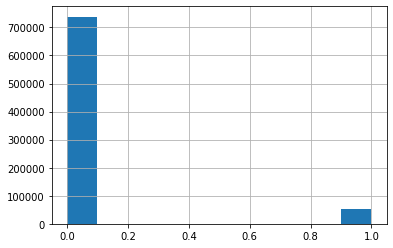

In [ ]:
train.loan_status.hist()

In [ ]:
train['loan_status'].value_counts() #0 is good 1 is default

0    738087
1     52937
Name: loan_status, dtype: int64

In [ ]:
train_default=np.array(train[train.loan_status==1].index) #default loans
no_train_default=len(train_default) #number of default loans
train_nodefault=np.array(train[train.loan_status!=1].index) #not default loans
no_train_nodefault=len(train_nodefault) #number of loans which do not default

print("No. of Default Transactions in Train is {} and No. of Transactions which do not Default in Train is {}".format(no_train_default, no_train_nodefault))

test_default=np.array(test[test.loan_status==1].index) #default loans
no_test_default=len(test_default) #number of default loans
test_nodefault=np.array(test[test.loan_status!=1].index) #not default loans
no_test_nodefault=len(test_nodefault) #number of loans which do not default

print("No. of Default Transactions in Test is {} and No. of Transactions which do not Default in Test is {}".format(no_test_default, no_test_nodefault))

validation_default=np.array(validation[validation.loan_status==1].index) #default loans
no_validation_default=len(validation_default) #number of default loans
validation_nodefault=np.array(validation[validation.loan_status!=1].index) #not default loans
no_validation_nodefault=len(validation_nodefault) #number of loans which do not default
print("No. of Default Transactions in Validation is {} and No. of Transactions which do not Default in Validation is {}".format(no_validation_default, no_validation_nodefault))

No. of Default Transactions in Train is 47643 and No. of Transactions which do not Default in Train is 664278
No. of Default Transactions in Test is 52564 and No. of Transactions which do not Default in Test is 706270
No. of Default Transactions in Validation is 5294 and No. of Transactions which do not Default in Validation is 73809


In [ ]:
X_train=train.iloc[:,train.columns!='loan_status']
y_train=train.iloc[:,train.columns=='loan_status']

X_test=test.iloc[:,test.columns!='loan_status']
y_test=test.iloc[:,test.columns=='loan_status']

X_validation = validation.drop('loan_status',axis =1)
y_validation = validation['loan_status']

In [ ]:
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received
0,2300,2300,2300.0,12.62,77.08,2,10,0.0,10000.0,21.61,0,1985,1.0,4,0,3911.0,55.1,6,0,2029.91,2029.91,382.99,382.99,270.09,112.90,0.0,77.08,0,0,0,0.0,3911.0,7100.0,0.0,0.0,1,36,2,0,0,1.0
1,16000,16000,16000.0,12.62,360.95,2,10,11.0,94000.0,25.61,0,1992,0.0,9,0,33752.0,105.8,26,0,14813.07,14813.07,2060.09,2060.09,1186.93,873.16,0.0,360.95,0,0,0,0.0,234457.0,31900.0,0.0,0.0,2,60,0,0,0,1.0
2,6025,6025,6025.0,15.05,209.01,2,13,8.0,46350.0,8.88,0,2002,0.0,11,0,12425.0,44.9,27,0,5340.82,5340.82,1032.46,1032.46,684.18,348.28,0.0,209.01,0,0,0,0.0,121311.0,27700.0,0.0,0.0,3,36,0,0,0,1.0
3,20400,20400,20400.0,9.44,652.91,1,5,11.0,44000.0,27.06,0,2007,1.0,15,0,8769.0,18.7,19,0,17898.81,17898.81,3237.80,3237.80,2501.19,736.61,0.0,652.91,0,0,0,0.0,62335.0,46900.0,0.0,0.0,0,36,3,1,0,1.0
4,13000,13000,13000.0,11.99,431.73,1,9,11.0,85000.0,6.79,1,2002,0.0,5,0,6866.0,88.0,24,0,11460.66,11460.66,2137.00,2137.00,1539.34,597.66,0.0,431.73,0,0,0,0.0,15332.0,7800.0,1.0,1.0,2,36,0,1,0,1.0


In [ ]:
#standardize train and test data
from sklearn.preprocessing import StandardScaler
X_train_num_cols = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
X_test_num_cols = X_test.columns[X_test.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
X_validation_num_cols = X_validation.columns[X_validation.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler=StandardScaler()
X_train[X_train_num_cols] = scaler.fit_transform(X_train[X_train_num_cols])
X_test[X_test_num_cols] = scaler.fit_transform(X_test[X_test_num_cols])
X_validation[X_validation_num_cols] = scaler.fit_transform(X_validation[X_validation_num_cols])

In [ ]:
X_train = np.array(X_train)
X_test=np.array(X_test)
X_validation=np.array(X_validation)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_validation=np.array(y_validation)

## 1 Basic Model

In [ ]:
from keras import models
from keras import layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu',kernel_regularizer="l2"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu',kernel_regularizer="l2"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation='relu',kernel_regularizer="l2"))
model.add(layers.Dense(1, activation='sigmoid'))
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, Callback
Es=EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True) 

history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), epochs=30, batch_size=256, callbacks = [Es])

Epoch 1/30
2781/2781 [==============================] - 9s 3ms/step - loss: 0.3317 - accuracy: 0.9675 - val_loss: 0.0906 - val_accuracy: 0.9824
Epoch 2/30
2781/2781 [==============================] - 9s 3ms/step - loss: 0.0901 - accuracy: 0.9826 - val_loss: 0.0846 - val_accuracy: 0.9829
Epoch 3/30
2781/2781 [==============================] - 9s 3ms/step - loss: 0.0852 - accuracy: 0.9831 - val_loss: 0.0837 - val_accuracy: 0.9828
Epoch 4/30
2781/2781 [==============================] - 8s 3ms/step - loss: 0.0835 - accuracy: 0.9833 - val_loss: 0.0808 - val_accuracy: 0.9838
Epoch 5/30
2781/2781 [==============================] - 8s 3ms/step - loss: 0.0815 - accuracy: 0.9836 - val_loss: 0.0807 - val_accuracy: 0.9834
Epoch 6/30
2781/2781 [==============================] - 8s 3ms/step - loss: 0.0798 - accuracy: 0.9838 - val_loss: 0.0790 - val_accuracy: 0.9837
Epoch 7/30
2781/2781 [==============================] - 8s 3ms/step - loss: 0.0795 - accuracy: 0.9838 - val_loss: 0.0785 - val_accuracy:

In [ ]:
print("The testing accuracy is:", model.evaluate(X_test, y_test))

23714/23714 [==============================] - 49s 2ms/step - loss: 0.1211 - accuracy: 0.9748
The testing accuracy is: [0.12106689065694809, 0.9747889637947083]


Confusion matrix, without normalization
[[702291   3979]
 [ 15152  37412]]


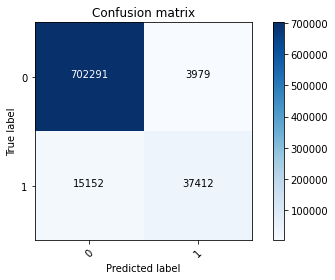

In [ ]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 128)               5376      
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_39 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_62 (Dense)             (None, 1)               

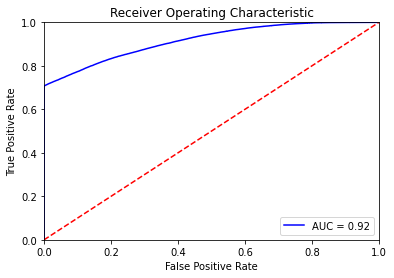

In [ ]:
#AUC_ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
pred = model.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2 Undersampling

In [ ]:
#apply undersampling
#train
random_train_nodefault_indices=np.random.choice(train_nodefault,no_train_default,replace=False)
random_train_nodefault_indices=np.array(random_train_nodefault_indices)
print(len(random_train_nodefault_indices))

47643


In [ ]:
under_sample_train_indices=np.concatenate([train_default,random_train_nodefault_indices])
print(len(under_sample_train_indices))

95286


In [ ]:
under_sample_train=train.loc[under_sample_train_indices,:]
under_sample_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received,loan_status
248171,2000.0,2000.0,2000.0,12.39,66.81,2,10,11.0,45000.0,25.95,0.0,2000,0.0,10.0,0.0,10735.0,34.9,17.0,1,0.0,0.0,264.49,264.49,187.52,76.97,0.0,66.81,0.0,0,0.0,0.0,34762.0,30800.0,0.0,0.0,9,36,4,1,0,1.0,1
272161,5600.0,5600.0,5600.0,13.98,191.35,2,12,6.0,26000.0,22.21,0.0,2001,0.0,8.0,0.0,3770.0,53.9,19.0,0,0.0,0.0,1335.10,1335.10,914.23,420.87,0.0,191.35,0.0,0,0.0,0.0,27273.0,7000.0,1.0,1.0,2,36,4,1,0,1.0,1
23019,13000.0,13000.0,12950.0,14.83,308.12,3,17,5.0,44400.0,16.49,0.0,2006,0.0,6.0,0.0,3532.0,78.5,7.0,1,0.0,0.0,4020.86,4005.43,1722.98,1660.18,0.0,308.12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,60,4,2,1,1.0,1
337571,10000.0,10000.0,10000.0,12.49,334.49,1,9,8.0,50000.0,11.48,0.0,2002,2.0,10.0,0.0,7604.0,21.4,15.0,0,0.0,0.0,2675.92,2675.92,1911.82,764.10,0.0,334.49,0.0,0,0.0,5564.0,23647.0,35500.0,1.0,1.0,2,36,0,1,0,1.0,1
111672,35000.0,35000.0,35000.0,24.08,1008.51,5,26,0.0,117120.0,12.19,0.0,1989,1.0,13.0,0.0,29968.0,49.8,35.0,1,0.0,0.0,10005.55,10005.55,1593.06,3447.89,30.0,10.00,0.0,0,0.0,0.0,62637.0,60200.0,1.0,1.0,6,60,4,2,1,1.0,1


In [ ]:
#validation
random_validation_nodefault_indices=np.random.choice(validation_nodefault,no_validation_default,replace=False)
random_validation_nodefault_indices=np.array(random_validation_nodefault_indices)
print(len(random_validation_nodefault_indices))

5294


In [ ]:
under_sample_validation_indices=np.concatenate([validation_default,random_validation_nodefault_indices])
print(len(under_sample_validation_indices))

10588


In [ ]:
under_sample_validation=validation.loc[under_sample_validation_indices,:]
under_sample_validation.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received,loan_status
86487,17450.0,17450.0,17450.0,16.20,426.21,2,13,4.0,102000.0,22.86,2.0,2002,1.0,17.0,0.0,123572.0,34.9,38.0,0,0.00,0.00,3835.89,3835.89,1811.34,2024.55,0.0,426.21,0.0,0,0.0,0.0,403708.0,175148.0,1.0,0.0,0,60,3,2,0,1.0,1
317824,6000.0,6000.0,6000.0,11.67,198.35,1,8,7.0,100000.0,15.22,1.0,1995,0.0,13.0,0.0,8795.0,39.8,34.0,0,0.00,0.00,2181.85,2181.85,1617.11,564.74,0.0,198.35,0.0,0,0.0,0.0,525909.0,22100.0,1.0,0.0,2,36,0,0,0,1.0,1
181347,12000.0,12000.0,12000.0,14.09,410.66,1,9,11.0,55000.0,22.41,0.0,2001,1.0,10.0,0.0,9407.0,82.5,28.0,1,0.00,0.00,10297.05,10297.05,6720.85,2304.99,0.0,410.66,0.0,0,0.0,0.0,151655.0,11400.0,0.0,0.0,2,36,0,0,1,1.0,1
150042,7000.0,7000.0,7000.0,13.11,236.23,1,8,9.0,60000.0,27.96,0.0,2007,0.0,10.0,0.0,11023.0,52.5,16.0,0,1143.35,1143.35,7323.13,7323.13,5856.65,1466.48,0.0,236.23,0.0,0,0.0,0.0,163738.0,20996.0,0.0,0.0,2,36,0,0,0,1.0,1
454248,8000.0,8000.0,8000.0,18.25,290.23,3,17,1.0,36000.0,25.11,0.0,1975,2.0,8.0,0.0,8822.0,56.6,10.0,1,0.00,0.00,3581.54,3581.54,1597.71,1034.36,30.0,50.00,0.0,0,0.0,0.0,28506.0,15600.0,0.0,0.0,2,36,4,0,1,1.0,1


In [ ]:
#test
random_test_nodefault_indices=np.random.choice(test_nodefault,no_test_default,replace=False)
random_test_nodefault_indices=np.array(random_test_nodefault_indices)
print(len(random_test_nodefault_indices))

52564


In [ ]:
under_sample_test_indices=np.concatenate([test_default,random_test_nodefault_indices])
print(len(under_sample_test_indices))

105128


In [ ]:
under_sample_test=test.loc[under_sample_test_indices,:]
under_sample_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,delinq,derog,purpose,term,home_ownership,verification_status,recovery,pymnt_received,loan_status
181,20000,20000,20000.0,18.06,723.66,3,16,3.0,85000.0,14.63,1,1992,1.0,4,0,11389.0,100.0,10,0,18272.99,18272.99,2844.47,2844.47,1727.01,1117.46,0.0,723.66,0,0,0,0.0,30878.0,11350.0,1.0,0.0,2,36,3,2,0,1.0,1
217,5000,5000,5000.0,10.42,162.33,1,7,11.0,35000.0,7.89,0,2006,0.0,3,0,2110.0,95.9,7,0,4640.15,4640.15,479.75,479.75,359.85,119.90,0.0,162.33,0,0,0,408.0,6341.0,2200.0,0.0,0.0,8,36,3,0,0,1.0,1
243,35000,35000,35000.0,15.05,833.57,2,13,11.0,450000.0,13.76,0,1975,2.0,14,0,226474.0,84.0,48,0,33801.26,33801.26,2427.55,2427.55,1198.74,1228.81,0.0,833.57,0,0,0,0.0,965418.0,269800.0,0.0,0.0,1,60,0,1,0,1.0,1
347,20000,20000,20000.0,20.00,743.28,3,18,5.0,52000.0,18.19,0,2005,0.0,6,0,2518.0,37.6,13,0,18753.02,18753.02,2174.28,2174.28,1246.98,927.30,0.0,743.28,0,0,0,0.0,16336.0,6700.0,1.0,0.0,2,36,3,2,0,1.0,1
382,5000,5000,5000.0,21.45,189.54,3,19,11.0,72500.0,19.20,0,1991,3.0,15,1,18787.0,57.6,31,0,4588.47,4588.47,743.26,743.26,411.53,331.73,0.0,189.54,0,0,0,0.0,39360.0,32600.0,1.0,1.0,7,36,0,2,0,1.0,1


In [ ]:
under_X_train=under_sample_train.iloc[:,under_sample_train.columns!='loan_status']
under_y_train=under_sample_train.iloc[:,under_sample_train.columns=='loan_status']
under_X_test=under_sample_test.iloc[:,under_sample_test.columns!='loan_status']
under_y_test=under_sample_test.iloc[:,under_sample_test.columns=='loan_status']
under_X_validation=under_sample_validation.iloc[:,under_sample_validation.columns!='loan_status']
under_y_validation=under_sample_validation.iloc[:,under_sample_validation.columns=='loan_status']

In [ ]:
#standardize under sample train and test data
under_X_train_num_cols = under_X_train.columns[under_X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
under_X_test_num_cols = under_X_test.columns[under_X_test.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
under_X_validation_num_cols = under_X_validation.columns[under_X_validation.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

under_X_train[under_X_train_num_cols] = scaler.fit_transform(under_X_train[under_X_train_num_cols])
under_X_test[under_X_test_num_cols] = scaler.fit_transform(under_X_test[under_X_test_num_cols])
under_X_validation[under_X_validation_num_cols] = scaler.fit_transform(under_X_validation[under_X_validation_num_cols])

In [ ]:
under_X_train = np.array(under_X_train)
under_X_test=np.array(under_X_test)
under_X_validation=np.array(under_X_validation)
under_y_train=np.array(under_y_train)
under_y_test=np.array(under_y_test)
under_y_validation=np.array(under_y_validation)

In [ ]:
from keras.layers import Dropout

# Define the model
under_model = models.Sequential()
under_model.add(layers.Dense(128, activation='relu', input_shape=(under_X_train.shape[1],)))
under_model.add(layers.Dense(64, activation='relu'))
#under_model.add(layers.Dropout(0.3))
under_model.add(layers.Dense(32, activation='relu'))
#under_model.add(layers.Dropout(0.3))
under_model.add(layers.Dense(16, activation='relu'))
#under_model.add(layers.Dropout(0.3))
under_model.add(layers.Dense(1, activation='sigmoid'))
# Compile the model

under_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, Callback
Es=EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True) 

history = under_model.fit(under_X_train, under_y_train, validation_data = (under_X_validation, under_y_validation), epochs=30, batch_size=64, callbacks = [Es])

Epoch 1/30
1489/1489 [==============================] - 4s 3ms/step - loss: 0.3076 - accuracy: 0.8634 - val_loss: 0.2417 - val_accuracy: 0.8935
Epoch 2/30
1489/1489 [==============================] - 4s 3ms/step - loss: 0.2362 - accuracy: 0.8963 - val_loss: 0.2334 - val_accuracy: 0.8948
Epoch 3/30
1489/1489 [==============================] - 4s 3ms/step - loss: 0.2309 - accuracy: 0.8984 - val_loss: 0.2345 - val_accuracy: 0.8954
Epoch 4/30
1489/1489 [==============================] - 4s 3ms/step - loss: 0.2251 - accuracy: 0.9011 - val_loss: 0.2357 - val_accuracy: 0.8938
Epoch 5/30
1489/1489 [==============================] - 4s 3ms/step - loss: 0.2237 - accuracy: 0.9006 - val_loss: 0.2380 - val_accuracy: 0.8937


In [ ]:
print("The testing accuracy is:", under_model.evaluate(under_X_test, under_y_test))

3286/3286 [==============================] - 5s 2ms/step - loss: 0.2968 - accuracy: 0.8618
The testing accuracy is: [0.29678070545196533, 0.8618445992469788]


Confusion matrix, without normalization
[[52564     0]
 [19494 33070]]


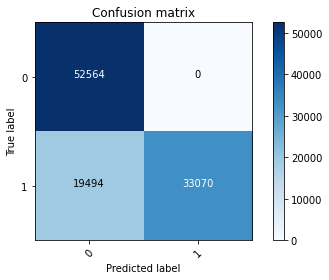

In [ ]:
under_y_pred=model.predict(under_X_test)
under_y_test=pd.DataFrame(under_y_test)
under_cnf_matrix=confusion_matrix(under_y_test,under_y_pred.round())
plot_confusion_matrix(under_cnf_matrix,classes=[0,1])
plt.show()

In [ ]:
under_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 128)               5376      
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_66 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 17        
Total params: 16,257
Trainable params: 16,257
Non-trainable params: 0
_________________________________________________________________


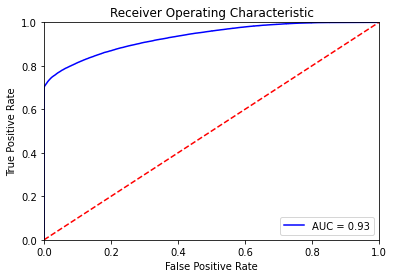

In [ ]:
#AUC_ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
pred = under_model.predict(under_X_test)
fpr, tpr, threshold = metrics.roc_curve(under_y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3 Oversampling

In [ ]:
#apply oversampling
from imblearn.over_sampling import SMOTE

In [ ]:
train=pk_read("/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_loan_processed_binary.pk")
test=pk_read("/content/drive/MyDrive/Deep Learning for Prediction/Final Project/Zixin_model/result/lc_2016_2017_processed_binary.pk")

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
train, validation=train_test_split(train,train_size=0.9,stratify=train["loan_status"])

print(train.shape,validation.shape,test.shape)

(791024, 42) (87892, 42) (758834, 42)


In [ ]:
X_train=train.iloc[:,train.columns!='loan_status']
y_train=train.iloc[:,train.columns=='loan_status']
X_test=test.iloc[:,test.columns!='loan_status']
y_test=test.iloc[:,test.columns=='loan_status']
X_validation = validation.drop('loan_status',axis =1)
y_validation = validation['loan_status']

In [ ]:
#standardize train and test data
from sklearn.preprocessing import StandardScaler
X_train_num_cols = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
X_test_num_cols = X_test.columns[X_test.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
X_validation_num_cols = X_validation.columns[X_validation.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler=StandardScaler()
X_train[X_train_num_cols] = scaler.fit_transform(X_train[X_train_num_cols])
X_test[X_test_num_cols] = scaler.fit_transform(X_test[X_test_num_cols])
X_validation[X_validation_num_cols] = scaler.fit_transform(X_validation[X_validation_num_cols])

In [ ]:
X_train_resample,y_train_resample= SMOTE().fit_sample(X_train,y_train.values.ravel())

In [ ]:
X_validation_resample,y_validation_resample= SMOTE().fit_sample(X_validation,y_validation.values.ravel())

In [ ]:
X_test_resample,y_test_resample= SMOTE().fit_sample(X_test,y_test.values.ravel())

In [ ]:
print("No. of X_train is {}, No. of X_validation is {}, No. of X_test is {}".format(X_train_resample.shape[0],X_validation_resample.shape[0], X_test_resample.shape[0]))

No. of X_train is 1476174, No. of X_validation is 164020, No. of X_test is 1412540


In [ ]:
X_train_resample = np.array(X_train_resample)
X_test_resample=np.array(X_test_resample)
X_validation_resample=np.array(X_validation_resample)
y_train_resample=np.array(y_train_resample)
y_test_resample=np.array(y_test_resample)
y_validation_resample=np.array(y_validation_resample)

In [ ]:
del over_model

In [ ]:
# Define the model
from keras import models
from keras import layers

over_model = models.Sequential()
over_model.add(layers.Dense(64, activation='relu', input_shape=(X_train_resample.shape[1],)))
over_model.add(layers.Dropout(0.3))
over_model.add(layers.Dense(32, activation='relu',kernel_regularizer="l2"))
over_model.add(layers.Dropout(0.3))
over_model.add(layers.Dense(32, activation='relu',kernel_regularizer="l2"))
over_model.add(layers.Dropout(0.3))
over_model.add(layers.Dense(16, activation='relu',kernel_regularizer="l2"))
over_model.add(layers.Dropout(0.3))
over_model.add(layers.Dense(1, activation='sigmoid'))
# Compile the model

over_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, Callback
Es=EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True) 

history = over_model.fit(X_train_resample, y_train_resample, validation_data = (X_validation_resample, y_validation_resample), epochs=20, batch_size=256, callbacks = [Es])

Epoch 1/20
5767/5767 [==============================] - 18s 3ms/step - loss: 0.3954 - accuracy: 0.8779 - val_loss: 0.2042 - val_accuracy: 0.9281
Epoch 2/20
5767/5767 [==============================] - 17s 3ms/step - loss: 0.2243 - accuracy: 0.9159 - val_loss: 0.1928 - val_accuracy: 0.9280
Epoch 3/20
5767/5767 [==============================] - 17s 3ms/step - loss: 0.2135 - accuracy: 0.9181 - val_loss: 0.1870 - val_accuracy: 0.9304
Epoch 4/20
5767/5767 [==============================] - 17s 3ms/step - loss: 0.2071 - accuracy: 0.9197 - val_loss: 0.1826 - val_accuracy: 0.9319
Epoch 5/20
5767/5767 [==============================] - 17s 3ms/step - loss: 0.2035 - accuracy: 0.9204 - val_loss: 0.1793 - val_accuracy: 0.9343
Epoch 6/20
5767/5767 [==============================] - 18s 3ms/step - loss: 0.2010 - accuracy: 0.9209 - val_loss: 0.1764 - val_accuracy: 0.9323
Epoch 7/20
5767/5767 [==============================] - 18s 3ms/step - loss: 0.1991 - accuracy: 0.9215 - val_loss: 0.1739 - val_ac

In [ ]:
print("The testing accuracy is:", over_model.evaluate(X_test_resample, y_test_resample))

44142/44142 [==============================] - 75s 2ms/step - loss: 0.6918 - accuracy: 0.7653
The testing accuracy is: [0.6918033957481384, 0.7653241753578186]


Confusion matrix, without normalization
[[449402 256868]
 [ 74621 631649]]


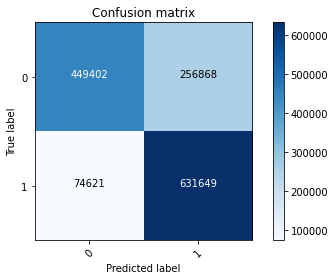

In [ ]:
over_y_pred=over_model.predict(X_test_resample)
over_y_test=pd.DataFrame(y_test_resample)
over_cnf_matrix=confusion_matrix(over_y_test,over_y_pred.round())
plot_confusion_matrix(over_cnf_matrix,classes=[0,1])
plt.show()

In [ ]:
over_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                2688      
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_45 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_46 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 16)              

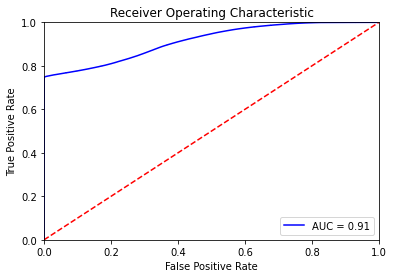

In [ ]:
#AUC_ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
pred = over_model.predict(X_test_resample)
fpr, tpr, threshold = metrics.roc_curve(y_test_resample, pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()